# IT5006 Group Project - FD001

# Experiment 1

## 1. Load the train data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime

from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [54]:
col_names = ['unit_id', 'cycle', 'sys1', 'sys2', 'sys3'] + [f"sensor{i}" for i in range(1, 22)]

train_df1 = pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD001.txt', delim_whitespace=True, header=None, names=col_names)

### How the data looks like:

In [55]:
train_df1.head()

,unit_id,cycle,sys1,sys2,sys3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## 2. Remove uninformative (near-constant) columns

By analysing all the fields using `describe` method, we can find fields 'sys3', 'sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18' and 'sensor19' are not changing much through the entire engine life, therefore we can drop them directly:

In [56]:
static_cols = ['sys3', 'sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18', 'sensor19'];
train_df1[static_cols].describe()

,sys3,sensor1,sensor5,sensor6,sensor10,sensor16,sensor18,sensor19
count,20631.0,2.063100e+04,2.063100e+04,20631.000000,2.063100e+04,2.063100e+04,20631.0,20631.0
mean,100.0,5.186700e+02,1.462000e+01,21.609803,1.300000e+00,3.000000e-02,2388.0,100.0
std,0.0,6.537152e-11,3.394700e-12,0.001389,4.660829e-13,1.556432e-14,0.0,0.0
min,100.0,5.186700e+02,1.462000e+01,21.600000,1.300000e+00,3.000000e-02,2388.0,100.0
25%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
50%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
75%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
max,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0


In [57]:
train_df1.drop(columns=static_cols, inplace=True)

In [58]:
train_df1

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


## 3. Perform basic checks
### Find missing cycle per unit (if any)
For FD001 we don't see missing cycles in the raw data.

In [59]:
def find_missing_cycles(df):
    missing_cycles = {}
    for unit_id, group in df.groupby('unit_id'):
        actual_cycles = group['cycle'].values
        expected_cycles = list(range(1, group['cycle'].max() + 1))  # Create the expected cycle sequence
        missing = sorted(set(expected_cycles) - set(actual_cycles))  # Compare and find missing cycles
        if missing:
            missing_cycles[unit_id] = missing
    return missing_cycles

missing_cycles = find_missing_cycles(train_df1)
if (len(missing_cycles)):
    print(missing_cycles)

### Check and fill null values (if any)
For FD001 we don't see null values.

In [60]:
for col in train_df1.columns:
    if(train_df1[col].isnull().any()):
        print("Column ",col," has null value(s).")
        train_df1[col] = train_df1.groupby('unit_num')[col].transform(lambda x: x.fillna(x.mean()))
# train_df1.describe()

## 4. Add Remaining Useful Life (RUL) as target

In [61]:
train_df1['RUL'] = train_df1.groupby('unit_id')['cycle'].transform(lambda x: x.max() - x).clip(upper=130)
train_df1.head()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,130
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,130
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,130
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,130
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,130


## 5. Visualize the data

### Crrelation heatmap

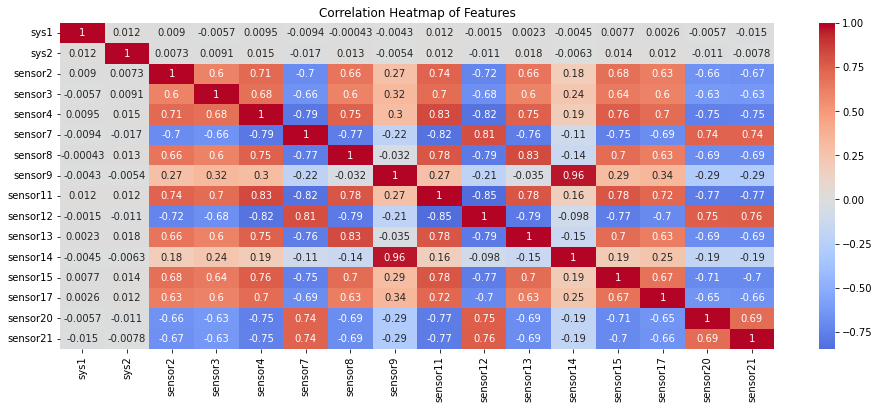

In [62]:
import seaborn as sns

cols = train_df1.columns
features_to_correlate = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]

correlation_matrix = train_df1[features_to_correlate].corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap of Features')
plt.show()

### Box plot for the entire dataset

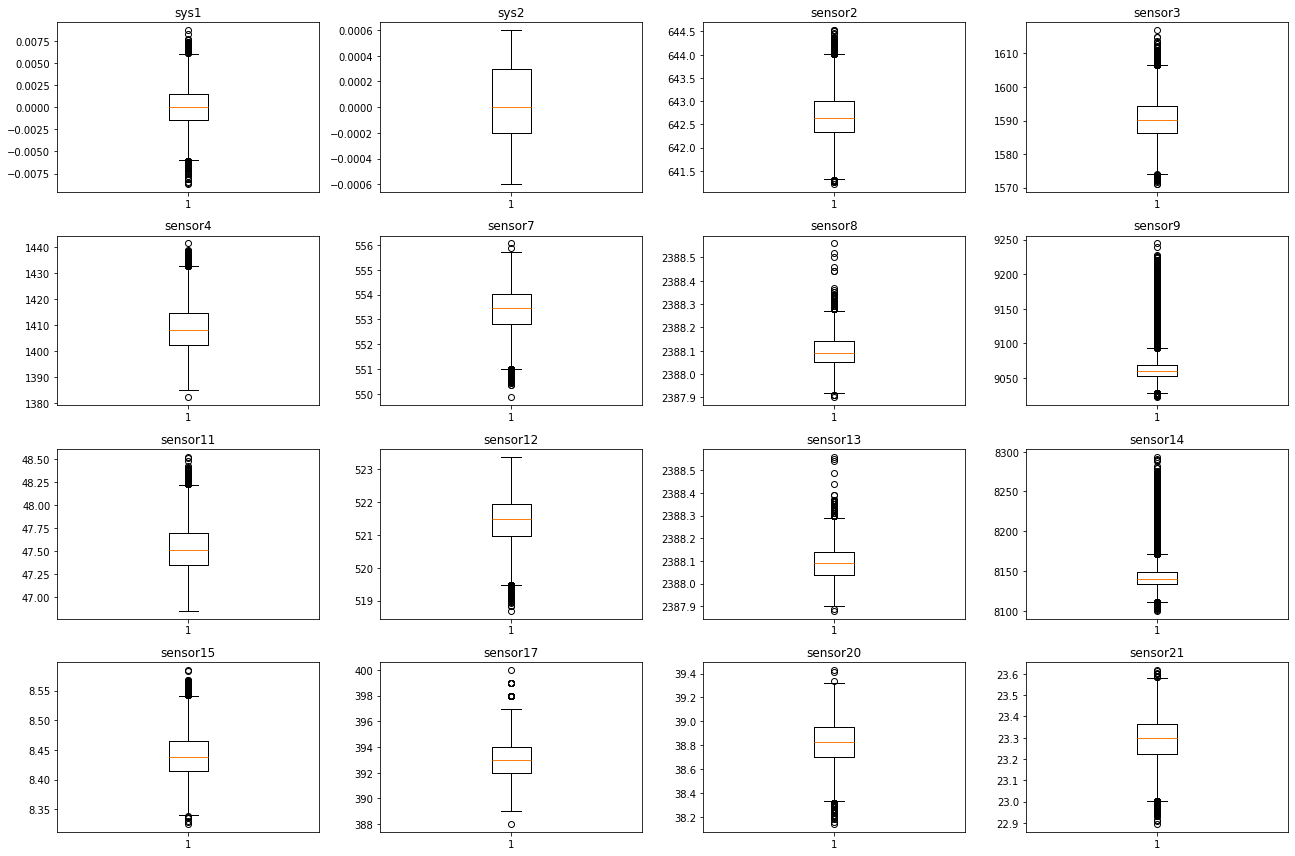

In [63]:
# Create a 4x4 grid of subplots
unit_id = 1
cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]

fig, axes = plt.subplots(4, 4, figsize = (18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(train_df1[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Box plot for one unit (unit_id = 1)
We can see that when looking into the data on single unit level, the sensor readings tend to have less outliers.

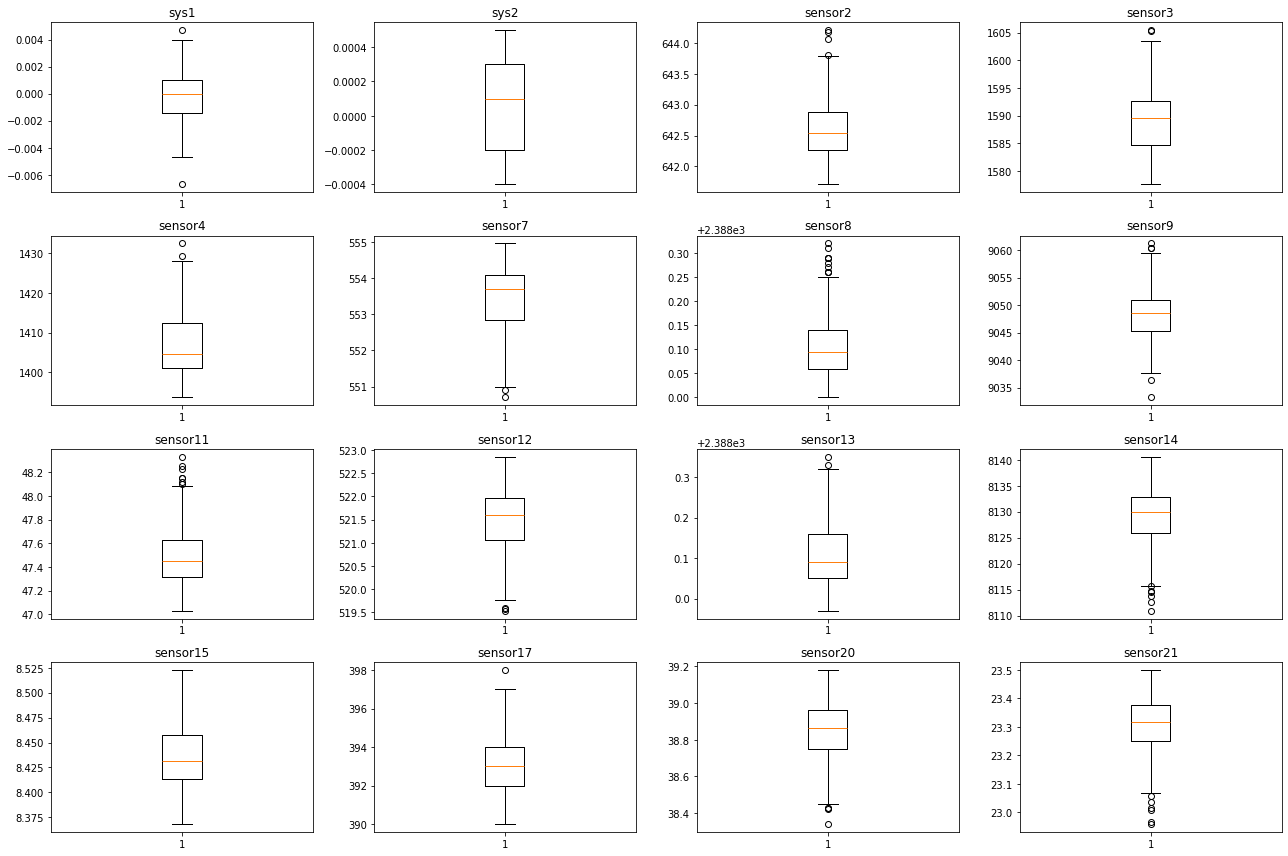

In [64]:
# Create a 4x4 grid of subplots
unit_id = 1
cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]
unit_df = train_df1[train_df1['unit_id'] == unit_id]

fig, axes = plt.subplots(4, 4, figsize = (18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(unit_df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Line plot for one unit (unit_id = 1)
We can see the system settings data are not linearly or binomially related to the RUL.

And the swings of the sensor readings suggest it's better to apply **rolling window** to smooth the noise.

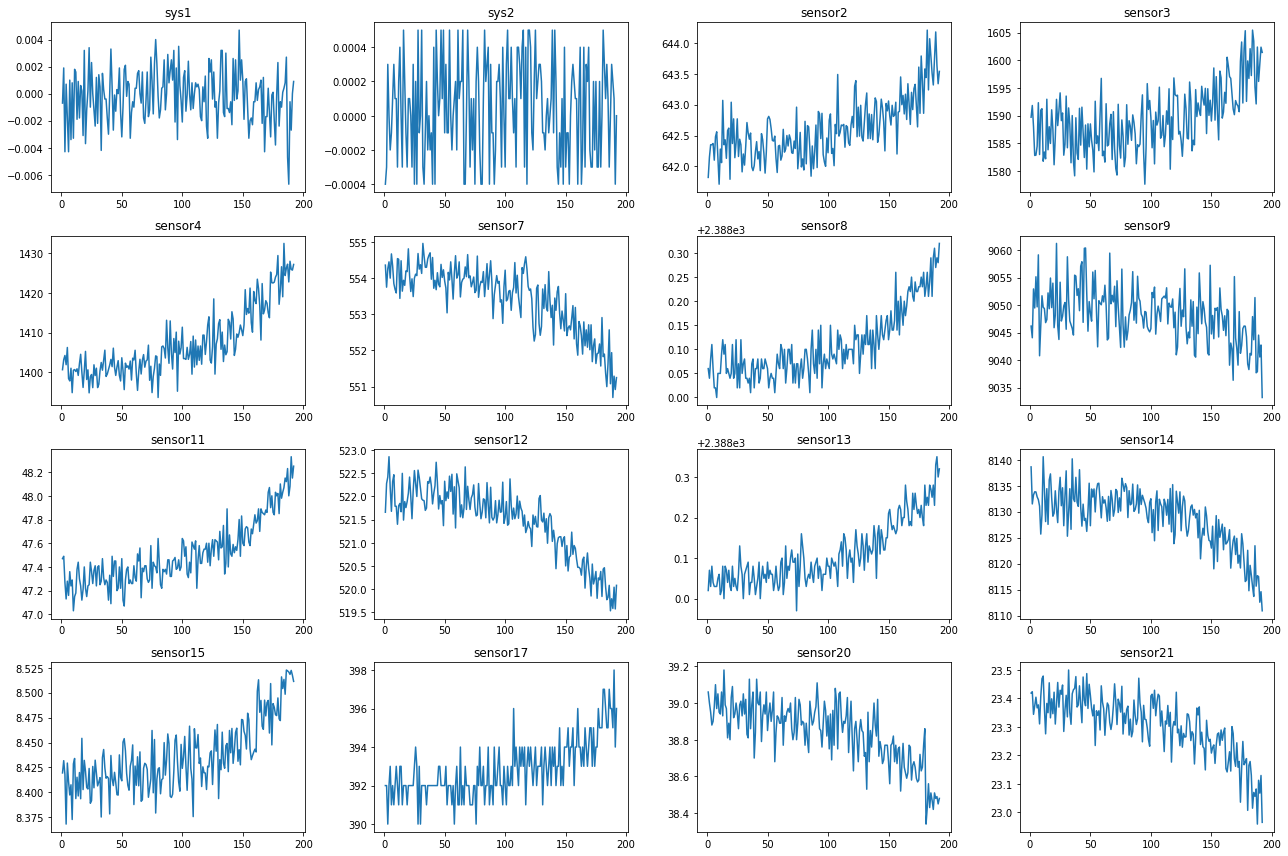

In [65]:
# Create a 4x4 grid of subplots
unit_id = 1
cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]
unit_df = train_df1[train_df1['unit_id'] == unit_id]

fig, axes = plt.subplots(4, 4, figsize = (18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].plot(unit_df['cycle'], unit_df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## 6. Feature Engineering
### Create new features

In [66]:
def create_features(df, window_size):
    # Initialize new features dataframe
    features = pd.DataFrame()
    features['unit_id'] = df['unit_id']
    features['cycle'] = df['cycle']

    # 1. Static statistical features
    sensor_cols = [col for col in df.columns if col.startswith('sensor')]
    agg_dict = {col: ['mean', 'std', 'min', 'max', 'var', skew, kurtosis] for col in sensor_cols}
    statistical_features = df.groupby('unit_id').agg(agg_dict)
    statistical_features.columns = ['_static_'.join(col) for col in statistical_features.columns]
    features = features.merge(statistical_features, on='unit_id', how='left')

    # 2. Rolling statistical features (using window_size)
    rolling_window = []
    stat_functions = {
        'mean': np.mean,
        'std': np.std,
        'min': np.min,
        'max': np.max,
        'var': np.var,
        'skew': skew,
        'kurtosis': kurtosis
    }
    
    for stat_name, stat_function in stat_functions.items():
        rolling_result = df.groupby('unit_id').rolling(window=window_size, on='cycle')[sensor_cols].apply(stat_function).reset_index()
        rolling_result = rolling_result[sensor_cols]
        rolling_result.columns = [f'{col}_rolling_{stat_name}' for col in sensor_cols]
        rolling_window.append(rolling_result)
    
    rolling_window = pd.concat(rolling_window, axis=1)
    features = pd.concat([features, rolling_window], axis=1)

    # 3. Immediate diff feature
    for col in sensor_cols:
        features[f'{col}_diff'] = df.groupby('unit_id')[col].diff()

    # 4. Rolling trend features
    for col in sensor_cols:
        slopes = []
        for unit_id in df['unit_id'].unique():
            unit_data = df[df['unit_id'] == unit_id]
            for i in range(len(unit_data)):
                if i < window_size - 1:
                    slopes.append(0)
                else:
                    y = unit_data.iloc[i-window_size+1:i+1][col].values
                    x = np.array(range(window_size)).reshape(-1, 1)
                    model = LinearRegression().fit(x, y)
                    slopes.append(model.coef_[0])
        features[f'{col}_rolling_slope'] = slopes

    # 5. Lag features
    lag_values = [5, 10]
    for col in sensor_cols:
        for lag in lag_values:
            features[f'{col}_lag_{lag}'] = df.groupby('unit_id')[col].shift(lag)

    # 6. Rolling lag features
    rolling_lag_values = [5, 10]
    for col in sensor_cols:
        for lag in rolling_lag_values:
            features[f'{col}_rolling_lag_{lag}'] = df.groupby('unit_id')[col].shift(lag).rolling(window=window_size).mean()

    # 7. Ratios between sensor readings and sensor rolling means
    # Creating ratios for temperature sensors 2, 3, 4 against pressure sensors 7
    sensor_numerators = ['sensor2', 'sensor3', 'sensor4']
    sensor_denominators = ['sensor7']

    for num in sensor_numerators:
        for denom in sensor_denominators:
            features[f'tp_ratio_{num}_to_{denom}'] = df[num] / (df[denom] + 1e-6) # add a small number to avoid division by 0
            features[f'rolling_mean_ratio_{num}_to_{denom}'] = features[f'{num}_rolling_mean'] / (features[f'{denom}_rolling_mean'] + 1e-6)
                
    df_with_features = pd.concat([df, features.drop(columns=['unit_id', 'cycle']).reset_index(drop=True)], axis=1)
    return df_with_features


In [67]:
train_df1_all = create_features(train_df1, 30)

# Display the resulting features
pd.set_option('display.max_columns', None)
train_df1_all.head()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sens

### Pre-processing all features

In [68]:
# Handle missing values by replacing infinite values and dropping NaNs
train_df1_all = train_df1_all.replace([np.inf, -np.inf], np.nan).dropna()
train_df1_all = train_df1_all.apply(pd.to_numeric, errors='coerce').dropna()

train_df1_features = train_df1_all.drop(columns=['unit_id','cycle','RUL'])
train_df1_seq = train_df1_all[['unit_id','cycle']]
train_df1_target = train_df1_all['RUL']

# Min-Max scaling
scaler = MinMaxScaler()
scaler.fit(train_df1_features)

train_df1_features_scaled = pd.DataFrame(scaler.fit_transform(train_df1_features), columns=train_df1_features.columns, index=train_df1_features.index)
train_df1_scaled = pd.concat([train_df1_seq, train_df1_features_scaled, train_df1_target], axis=1)

train_df1_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

Note that in the above summary, we see min cycle of 40 and max cycle of 362, as well as the max RUL of 322. This is because we have rolling window of 30 and rolling lag of 10 created. So 362 - 30 - 10 = 322.

## 7. Apply the same steps to test data set
### Prepare X_test (test_FD001.txt)

In [69]:
col_names = ['unit_id', 'cycle', 'sys1', 'sys2', 'sys3'] + [f"sensor{i}" for i in range(1, 22)]

test_df1 = pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD001.txt', delim_whitespace=True, header=None, names=col_names)
test_df1.drop(columns=static_cols, inplace=True)

test_df1_all = create_features(test_df1, 30)

In [70]:
test_df1_all = test_df1_all.replace([np.inf, -np.inf], np.nan).dropna()
test_df1_all = test_df1_all.apply(pd.to_numeric, errors='coerce').dropna()

test_df1_features = test_df1_all.drop(columns=['unit_id','cycle'])
test_df1_seq = test_df1_all[['unit_id','cycle']]

# Reuse the min-max scaler fitted using training data to scale the test data
test_df1_features_scaled = pd.DataFrame(scaler.fit_transform(test_df1_features), columns=test_df1_features.columns, index=test_df1_features.index)
test_df1_scaled = pd.concat([test_df1_seq, test_df1_features_scaled], axis=1)

# This is our X_test
test_df1_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

 ### Prepare y_test (RUL_FD001.txt)

In [71]:
RUL_df1 = pd.read_csv('C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD001.txt', delim_whitespace=True, header=None, names=['RUL'])
RUL_df1['unit_id'] = range(1, len(RUL_df1) + 1)

## 8. Build ramdom forest model using all features

In [72]:
from sklearn.model_selection import train_test_split,GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def fit_rf_model(X, y, param_grid):
    # Set up TimeSeriesSplit for time-series cross-validation
    tscv = TimeSeriesSplit(n_splits=3)
    
    # Initialize Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42)
    
    # Perform Grid Search
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=tscv, n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    return grid_search

def plot_feature_importances(model, cols, n):
    feature_importance = model.feature_importances_
    indices = np.argsort(feature_importance)[::-1][:n]

    top_features = feature_importance[indices]
    top_feature_names = cols[indices]

    plt.figure(figsize=(8, 4))
    plt.title(f"Top {n} Feature Importances")
    plt.barh(top_feature_names, top_features, color="blue", align="center")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.gca().invert_yaxis()
    plt.show()


### Evaluate model and plot feature importances

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Root Mean Squared Error (RMSE): 33.853279225686585


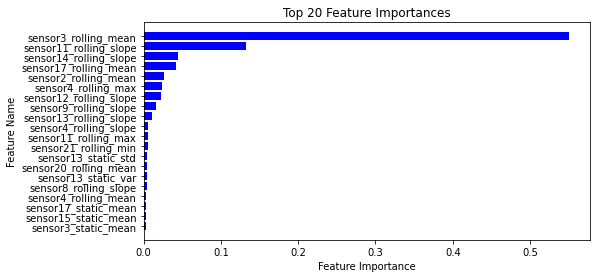

In [73]:
# Select features and target
X_train = train_df1_scaled.drop(columns=['RUL', 'unit_id', 'cycle'])
y_train = train_df1_scaled['RUL'] # Note: RUL is not scaled
X_test = test_df1_scaled.drop(columns=['unit_id', 'cycle'])
y_test = RUL_df1['RUL']

# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 7, 8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4]
}

grid_search_rf = fit_rf_model(X_train, y_train, param_grid)

# Best parameters
print(f'Best Parameters: {grid_search_rf.best_params_}')

# Make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)
y_pred_df = pd.DataFrame({'unit_id': test_df1_scaled['unit_id'].values, 'RUL_pred': y_pred}).groupby('unit_id').tail(1)
res_df1 = pd.merge(y_pred_df, RUL_df1, on='unit_id', how='left')

mse = mean_squared_error(res_df1['RUL'], res_df1['RUL_pred'])
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

plot_feature_importances(best_rf_model, X_train.columns, 20)

From above we can see most important features are rolling features. So we can try fit a new model with only rolling features.
## 9. Build ramdom forest model using rolling features

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 200}
Root Mean Squared Error (RMSE): 32.47644980379332


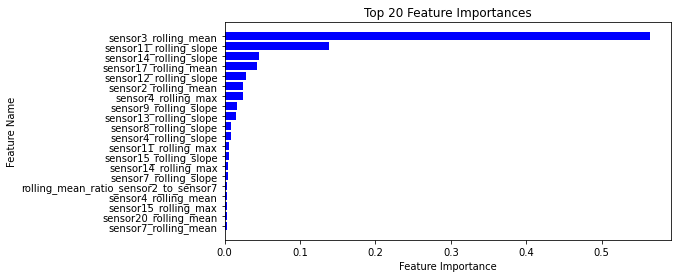

In [74]:
# Select features and target
# Reuse y_train and y_test
X_train_rolling = train_df1_scaled.filter(like='rolling')
X_test_rolling = test_df1_scaled.filter(like='rolling')

# Set up the parameter grid for Grid Search
param_grid_rolling = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 7, 8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4]
}

grid_search_rf = fit_rf_model(X_train_rolling, y_train, param_grid_rolling)

# Best parameters
print(f'Best Parameters: {grid_search_rf.best_params_}')

# Make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test_rolling)
y_pred_df = pd.DataFrame({'unit_id': test_df1_scaled['unit_id'].values, 'RUL_pred': y_pred}).groupby('unit_id').tail(1)
res_df1_rolling = pd.merge(y_pred_df, RUL_df1, on='unit_id', how='left')

mse = mean_squared_error(res_df1_rolling['RUL'], res_df1_rolling['RUL_pred'])
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

plot_feature_importances(best_rf_model, X_train_rolling.columns, 20)

## 10. Try Random Forest with rolling features and window size of 40

In [75]:
train_df1_all_40 = create_features(train_df1, 40)
# Handle missing values by replacing infinite values and dropping NaNs
train_df1_all_40 = train_df1_all_40.replace([np.inf, -np.inf], np.nan).dropna()
train_df1_all_40 = train_df1_all_40.apply(pd.to_numeric, errors='coerce').dropna()

train_df1_40_features = train_df1_all_40.drop(columns=['unit_id','cycle','RUL'])
train_df1_40_seq = train_df1_all_40[['unit_id','cycle']]
train_df1_40_target = train_df1_all_40['RUL']

# Min-Max scaling
scaler = MinMaxScaler()
scaler.fit(train_df1_40_features)

train_df1_40_features_scaled = pd.DataFrame(scaler.fit_transform(train_df1_40_features), columns=train_df1_40_features.columns, index=train_df1_40_features.index)
train_df1_40_scaled = pd.concat([train_df1_40_seq, train_df1_40_features_scaled, train_df1_40_target], axis=1)

train_df1_40_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

In [76]:
test_df1_40_all = create_features(test_df1, 40)
test_df1_40_all = test_df1_40_all.replace([np.inf, -np.inf], np.nan).dropna()
test_df1_40_all = test_df1_40_all.apply(pd.to_numeric, errors='coerce').dropna()

test_df1_40_features = test_df1_40_all.drop(columns=['unit_id','cycle'])
test_df1_40_seq = test_df1_40_all[['unit_id','cycle']]

# Reuse the min-max scaler fitted using training data to scale the test data
test_df1_40_features_scaled = pd.DataFrame(scaler.fit_transform(test_df1_40_features), columns=test_df1_40_features.columns, index=test_df1_40_features.index)
test_df1_40_scaled = pd.concat([test_df1_40_seq, test_df1_40_features_scaled], axis=1)

# This is our X_test
test_df1_40_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Root Mean Squared Error (RMSE): 32.635287281272674


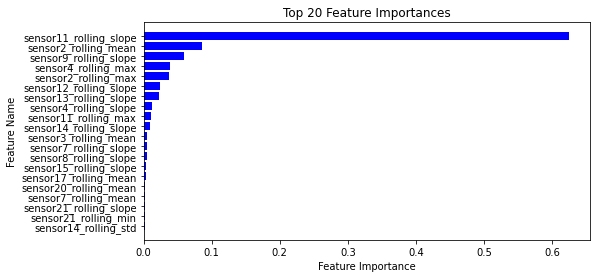

In [77]:
# Select features and target
X_train_40_rolling = train_df1_40_scaled.filter(like='rolling')
y_train = train_df1_40_scaled['RUL']
X_test_40_rolling = test_df1_40_scaled.filter(like='rolling')

# Set up the parameter grid for Grid Search
param_grid_rolling = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 7, 8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4]
}

grid_search_rf = fit_rf_model(X_train_40_rolling, y_train, param_grid_rolling)

# Best parameters
print(f'Best Parameters: {grid_search_rf.best_params_}')

# Make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test_40_rolling)
y_pred_df = pd.DataFrame({'unit_id': test_df1_40_scaled['unit_id'].values, 'RUL_pred': y_pred}).groupby('unit_id').tail(1)
res_df1_rolling_40 = pd.merge(y_pred_df, RUL_df1, on='unit_id', how='left')

mse = mean_squared_error(res_df1_rolling_40['RUL'], res_df1_rolling_40['RUL_pred'])
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

plot_feature_importances(best_rf_model, X_train_40_rolling.columns, 20)

# Experiment 2: Tsfresh with removed sensors

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [9]:
col_1 = ['unit', 'time', 'op1', 'op2', 'op3']
col_2 = [f'sr{i+1}' for i in range(21)]
columns = col_1 + col_2

# Load datasets and assign column names
df = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD001.txt', delim_whitespace=True, header=None, names=columns)
test = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD001.txt', delim_whitespace=True, header=None, names=columns)

# Add features to training data
df['max_time'] = df.groupby('unit')['time'].transform('max')
df['remaining_time'] = df['max_time'] - df['time']
df['label'] = df['remaining_time'].clip(upper=130)

# Preview data
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,130
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,130
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,130
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,130
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,130


In [10]:
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


## 2.1 Exploratory data analysis

same as experiment 1, but we choose to remove all Operating system

## 2.2 data preprocessing

In [11]:
window_size = 30

rolling_params = {
    "column_id": "unit",
    "column_sort": "time",
    "max_timeshift": window_size - 1,
    "min_timeshift": window_size-1,
    "rolling_direction": 1
}

rolled_df = roll_time_series(df, **rolling_params)

rolled_test = roll_time_series(test, **rolling_params)

Rolling: 100%|██████████| 51/51 [00:04<00:00, 11.22it/s]


In [15]:
rolled_df

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,id
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100.0,39.06,23.4190,192,191,130,"(1, 30)"
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100.0,39.00,23.4236,192,190,130,"(1, 30)"
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.03,390,2388,100.0,38.95,23.3442,192,189,130,"(1, 30)"
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.03,392,2388,100.0,38.88,23.3739,192,188,130,"(1, 30)"
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.03,393,2388,100.0,38.90,23.4044,192,187,130,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498235,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,0.03,397,2388,100.0,38.49,22.9735,200,4,4,"(100, 200)"
498236,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,0.03,395,2388,100.0,38.30,23.1594,200,3,3,"(100, 200)"
498237,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,0.03,398,2388,100.0,38.44,22.9333,200,2,2,"(100, 200)"
498238,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,0.03,395,2388,100.0,38.29,23.0640,200,1,1,"(100, 200)"


In [16]:
rolled_test

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,id
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,"(1, 30)"
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,"(1, 30)"
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,"(1, 30)"
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,"(1, 30)"
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297865,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,"(100, 198)"
297866,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,"(100, 198)"
297867,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,"(100, 198)"
297868,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,"(100, 198)"


## 2.3 feature engineering with Tsfresh

In [14]:
selected_cols=['id','sr2', 'sr3', 'sr4',
                    'sr7', 'sr8', 'sr9', 'sr11',
                    'sr12', 'sr13', 'sr14', 'sr15',
                    'sr17', 'sr20', 'sr21']

selected_df=rolled_df[selected_cols]
selected_test=rolled_test[selected_cols]

In [17]:
from tsfresh.feature_extraction import EfficientFCParameters
extraction_settings = EfficientFCParameters()

feature_params = {
    "column_id": "id",
    "impute_function": impute,
    "default_fc_parameters": extraction_settings
}

X = extract_features(selected_df, **feature_params)
x_test = extract_features(selected_test, **feature_params)

Feature Extraction: 100%|██████████| 60/60 [06:57<00:00,  6.96s/it] 


In [38]:
print(X.shape)
print(x_test.shape)

(17731, 10878)
(10196, 10878)


## 2.4 Feature selection with Tsfresh 

In [18]:
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)
X_filtered

sr15__sum_values  \
1   30           252.3483   
    31           252.3392   
    32           252.3222   
    33           252.2797   
    34           252.3464   
...                   ...   
100 196          255.0092   
    197          255.0563   
    198          255.1234   
    199          255.1690   
    200          255.1682   

         sr4__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)  \
1   30                                         5473.620088              
    31                                         5473.111949              
    32                                         5472.644902              
    33                                         5471.911420              
    34                                         5471.630234              
...                                                    ...              
100 196                                        5556.906361              
    197                                        5557.470834              
    198                                        5557.866923              
    199                                        5557.920060              
    200                                        5558.205046              

         sr4__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)  \
1   30                                         4203.067817              
    31                                         4203.131235              
    32                                         4202.573864              
    33                                         4202.414151              
    34                                         4202.107056              
...                                                    ...              
100 196                                        4262.979408              
    197                                        4263.070538              
    198                                        4262.261761              
    199                                        4261.998052              
    200                                        4261.715461              

         sr4__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)  \
1   30                                         5285.974261             
    31                                         5285.715017             
    32                                         5284.866110             
    33                                         5284.256853             
    34                                         5283.835965             
...                                                    ...             
100 196                                        5365.725045             
    197                                        5366.811791             
    198                                        5366.551178             
    199                                        5366.563568             
    200                                        5366.381925             

         sr4__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)  \
1   30                                         4179.497814             
    31                                         4179.215792             
    32                                         4179.235955             
    33                                         4178.660532             
    34                                         4178.540498             
...                                                    ...             
100 196                                        4239.626690             
    197                                        4238.849456             
    198                                        4238.835853             
    199                                        4237.978369             
    200                                        4237.684858             

         sr4__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)  \
1   30                                         1053.346858            
    31                            

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

selected_features = relevant_features_scaled_df.columns 
relevant_test_features = x_test[selected_features]
relevant_test_features_scaled = scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

In [20]:
print(selected_features)

Index(['sr15__sum_values',
       'sr4__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)',
       'sr4__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20)',
       ...
       'sr13__change_quantiles__f_agg_"var"__isabs_True__qh_0.6__ql_0.2',
       'sr21__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6',
       'sr7__lempel_ziv_complexity__bins_2', 'sr15__fourier_entropy__bins_10',
       'sr11__sum_of_reoccurring_values',
       'sr13__change_quantiles__f_agg_"var"__isabs_True__qh_1.0

In [ ]:
print(relevant_features_scaled_df.shape)
print(relevant_test_features_scaled_df.shape)

(17731, 4237)
(10196, 4237)


## 2.5 predictive modeling

In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [22]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD001.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
y_test = true_rul['RUL']

In [23]:
def calculate_s_score(y_true, y_pred):
    # Calculate the error between predictions and actual values
    error = y_pred - y_true
    
    # Apply S-score calculation
    s_score = np.where(
        error <= 0, 
        np.exp(-error / 13) - 1, 
        np.exp(error / 10) - 1
    )
    
    # Return the mean S-score
    return np.mean(s_score)


def evaluate_model(model, X_train, y_train, X_val, y_val, X_test=None, Y_test=None):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics for validation
    s_score = calculate_s_score(y_val, y_pred)
    mse_val = mean_squared_error(y_val, y_pred)
    rmse_val = mse_val ** 0.5
    
    # Print validation results
    model_name = model.__class__.__name__
    print(f'{model_name} model - Validation Set')
    print('RMSE:', rmse_val)
    print('S-score:', s_score)
    print('---------------------')
    
    results = {'model': model_name, 'rmse_val': rmse_val, 's_score': s_score}
    
    # If test set provided, predict and evaluate on test set
    if X_test is not None and Y_test is not None:
        y_pred_test = model.predict(X_test)
        temp = rolled_test.groupby('id').last()
        temp['prediction'] = y_pred_test
        Y_pred = temp.groupby('unit')['prediction'].last().to_numpy()
        
        # Calculate RMSE for test set
        s_test = calculate_s_score(Y_test, Y_pred)
        mse_test = mean_squared_error(Y_test, Y_pred)
        rmse_test = mse_test ** 0.5
        print(f'{model_name} model - Test Set')
        print('Test RMSE:', rmse_test)
        print('Test score:', s_test)
        print('---------------------')
        
        # Store test results in the results dictionary
        results.update({'rmse_test': rmse_test, 'test_score': s_test})
    
    return results

cnn_lstm.py is provided in folder.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from cnn_lstm import ConvLSTMRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison

results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 8.51644297098169
S-score: 1.2095984261414428
---------------------
XGBRegressor model - Test Set
Test RMSE: 14.197854455066516
Test score: 3.1485740784256713
---------------------
RandomForestRegressor model - Validation Set
RMSE: 8.913545867437085
S-score: 1.3566226607601064
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 14.420283902008364
Test score: 3.1925026701236523
---------------------
MLPRegressor model - Validation Set
RMSE: 4.59941310628827
S-score: 0.41875341204045113
---------------------
MLPRegressor model - Test Set
Test RMSE: 16.7898834589876
Test score: 5.274346519668184
---------------------
Epoch 1/10, Loss: 22.8700
Epoch 2/10, Loss: 1.0926
Epoch 3/10, Loss: 0.5630
Epoch 4/10, Loss: 0.3908
Epoch 5/10, Loss: 0.3508
Epoch 6/10, Loss: 0.2963
Epoch 7/10, Loss: 0.2412
Epoch 8/10, Loss: 0.2205
Epoch 9/10, Loss: 0.2127
Epoch 10/10, Loss: 0.2097
ConvLSTMRegressor model - Validation Set
RMSE: 3.0937427763557745

### 2.6 PCA dimension reduction to prevent overfitting

result did not improve after PCA dimension reduction

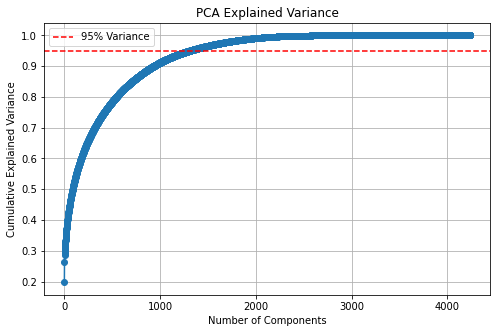

Optimal number of components for 95% variance: 1308


In [25]:
from sklearn.decomposition import PCA
pca = PCA()  # Adjust based on your dataset
pca.fit(X_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components to retain at least 95% variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:", optimal_n_components)

In [30]:
pca = PCA(n_components=optimal_n_components)  # Adjust based on your dataset
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(relevant_test_features_scaled_df)

In [31]:
# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train_reduced.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train_reduced, y_train, X_val_reduced, y_val, X_test=X_test_reduced, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 10.453662553924959
S-score: 1.8018623498117705
---------------------
XGBRegressor model - Test Set
Test RMSE: 14.698160695367193
Test score: 3.3694758309743698
---------------------
RandomForestRegressor model - Validation Set
RMSE: 29.330119506685584
S-score: 22.391506338471327
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 29.255624732486794
Test score: 28.822832776491133
---------------------
MLPRegressor model - Validation Set
RMSE: 6.080134515478448
S-score: 0.5705849684162609
---------------------
MLPRegressor model - Test Set
Test RMSE: 18.116447750546307
Test score: 4.741585338565018
---------------------
Epoch 1/10, Loss: 19.4675
Epoch 2/10, Loss: 1.2153
Epoch 3/10, Loss: 0.7524
Epoch 4/10, Loss: 0.6082
Epoch 5/10, Loss: 0.5064
Epoch 6/10, Loss: 0.4502
Epoch 7/10, Loss: 0.3507
Epoch 8/10, Loss: 0.3004
Epoch 9/10, Loss: 0.2776
Epoch 10/10, Loss: 0.2603
ConvLSTMRegressor model - Validation Set
RMSE: 5.03185394682

## 2.7 residual plot

result did not improve after PCA dimension reduction

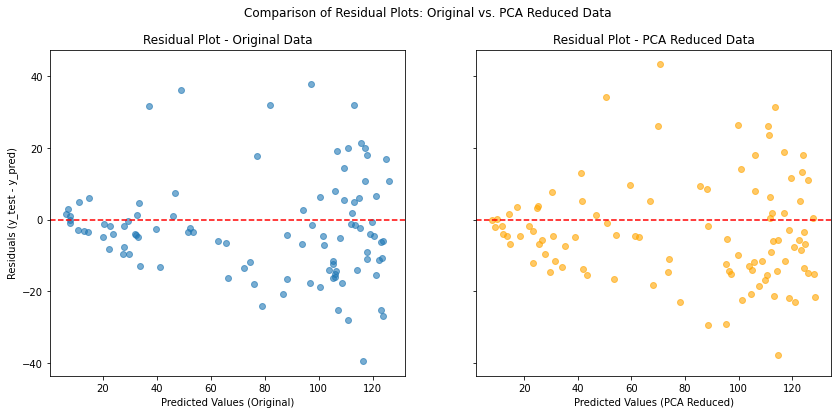

In [32]:
XGBoost= XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist')
XGBoost.fit(X_train, y_train)
y_pred = XGBoost.predict(relevant_test_features_scaled_df)
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred
y_pred_original = temp.groupby('unit')['prediction'].last().to_numpy()

XGBoost= XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist')
XGBoost.fit(X_train_reduced, y_train)
y_pred = XGBoost.predict(X_test_reduced)
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred
y_pred_pca = temp.groupby('unit')['prediction'].last().to_numpy()

residuals_original = y_test - y_pred_original
residuals_pca = y_test - y_pred_pca

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Original data residual plot
axes[0].scatter(y_pred_original, residuals_original, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Values (Original)")
axes[0].set_ylabel("Residuals (y_test - y_pred)")
axes[0].set_title("Residual Plot - Original Data")

# PCA-reduced data residual plot
axes[1].scatter(y_pred_pca, residuals_pca, alpha=0.6, color="orange")
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted Values (PCA Reduced)")
axes[1].set_title("Residual Plot - PCA Reduced Data")

plt.suptitle("Comparison of Residual Plots: Original vs. PCA Reduced Data")
plt.show()

# Experiment 3 with all sensors

In [41]:
#select and extract features (uses all sensors)
selected_cols=['id', 'sr1','sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']
selected_df=rolled_df[selected_cols]
selected_test=rolled_test[selected_cols]

In [43]:
feature_params = {
    "column_id": "id",
    "impute_function": impute,
    "default_fc_parameters": extraction_settings
}

X = extract_features(selected_df, **feature_params)
x_test = extract_features(selected_test, **feature_params)

print(X.shape)
print(x_test.shape)

Feature Extraction: 100%|██████████| 60/60 [09:58<00:00,  9.98s/it]  


In [44]:
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)
X_filtered

sr2__sum_values  \
1   30          19269.85   
    31          19270.05   
    32          19270.23   
    33          19270.59   
    34          19270.78   
...                  ...   
100 196         19298.93   
    197         19298.90   
    198         19299.35   
    199         19299.73   
    200         19300.87   

         sr15__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20)  \
1   30                                           29.217642              
    31                                           29.217530              
    32                                           29.213309              
    33                                           29.211379              
    34                                           29.219420              
...                                                    ...              
100 196                                          29.511664              
    197                                          29.515914              
    198                                          29.517043              
    199                                          29.518587              
    200                                          29.517111              

         sr15__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20)  \
1   30                                           23.881620              
    31                                           23.880309              
    32                                           23.882483              
    33                                           23.886501              
    34                                           23.891524              
...                                                    ...              
100 196                                          24.130337              
    197                                          24.136323              
    198                                          24.135187              
    199                                          24.135389              
    200                                          24.136678              

         sr15__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20)  \
1   30                                            9.102839             
    31                                            9.103483             
    32                                            9.109627             
    33                                            9.115923             
    34                                            9.114446             
...                                                    ...             
100 196                                           9.198008             
    197                                           9.196242             
    198                                           9.201487             
    199                                           9.209944             
    200                                           9.222888             

         sr15__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)  \
1   30                                           27.833924              
    31                                           27.832365              
    32                                           27.830229              
    33                                           27.828312              
    34                                           27.834542              
...                                                    ...              
100 196                                          28.114293              
    197                                          28.118605              
    198                                          28.117803              
    199                                          28.119624              
    200                                          28.119341              

         sr11__sum_values  sr11__abs_energy  \
1   30            1418.48        67069.9104   
    31            1418.42        67064.2176   
    32            1418.18        67

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

selected_features = relevant_features_scaled_df.columns 
relevant_test_features = x_test[selected_features]
relevant_test_features_scaled = scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

print(relevant_features_scaled_df.shape)
print(relevant_test_features_scaled_df.shape)

(17731, 4524)
(10196, 4524)


In [47]:
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [48]:
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison

results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 8.561010127719598
S-score: 1.2244383324695107
---------------------
XGBRegressor model - Test Set
Test RMSE: 14.11419220328423
Test score: 2.9609108556840043
---------------------
RandomForestRegressor model - Validation Set
RMSE: 9.00037408487012
S-score: 1.4053209765873687
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 14.46836537777244
Test score: 3.184168094863533
---------------------
MLPRegressor model - Validation Set
RMSE: 4.4114763551324465
S-score: 0.41877222703527694
---------------------
MLPRegressor model - Test Set
Test RMSE: 15.425832952703455
Test score: 4.76186603529601
---------------------
Epoch 1/10, Loss: 23.1763
Epoch 2/10, Loss: 1.3934
Epoch 3/10, Loss: 0.7771
Epoch 4/10, Loss: 0.5617
Epoch 5/10, Loss: 0.4485
Epoch 6/10, Loss: 0.3724
Epoch 7/10, Loss: 0.2992
Epoch 8/10, Loss: 0.2707
Epoch 9/10, Loss: 0.2520
Epoch 10/10, Loss: 0.2493
ConvLSTMRegressor model - Validation Set
RMSE: 3.6711477586049033

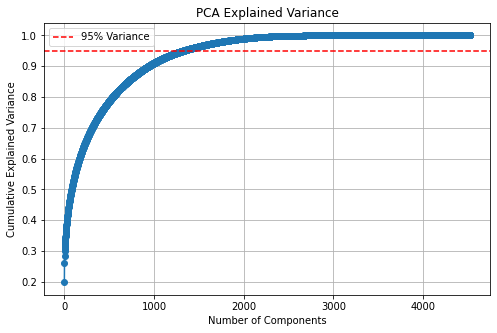

Optimal number of components for 95% variance: 1326


In [49]:
from sklearn.decomposition import PCA
pca = PCA()  # Adjust based on your dataset
pca.fit(X_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components to retain at least 95% variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:", optimal_n_components)

In [50]:
pca = PCA(n_components=optimal_n_components)  # Adjust based on your dataset
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(relevant_test_features_scaled_df)

In [51]:
# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train_reduced.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train_reduced, y_train, X_val_reduced, y_val, X_test=X_test_reduced, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 10.542085394821937
S-score: 1.8608431147447473
---------------------
XGBRegressor model - Test Set
Test RMSE: 15.58854412125508
Test score: 4.410126686283047
---------------------
RandomForestRegressor model - Validation Set
RMSE: 29.703537184826047
S-score: 23.01445829055143
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 30.24756868909227
Test score: 30.29111227115156
---------------------
MLPRegressor model - Validation Set
RMSE: 5.49497712799007
S-score: 0.5527641787987927
---------------------
MLPRegressor model - Test Set
Test RMSE: 16.417456378402175
Test score: 3.849519805653508
---------------------
Epoch 1/10, Loss: 18.3216
Epoch 2/10, Loss: 1.1325
Epoch 3/10, Loss: 0.7273
Epoch 4/10, Loss: 0.5549
Epoch 5/10, Loss: 0.4613
Epoch 6/10, Loss: 0.4215
Epoch 7/10, Loss: 0.3421
Epoch 8/10, Loss: 0.2844
Epoch 9/10, Loss: 0.2640
Epoch 10/10, Loss: 0.2437
ConvLSTMRegressor model - Validation Set
RMSE: 4.714120027538048
S

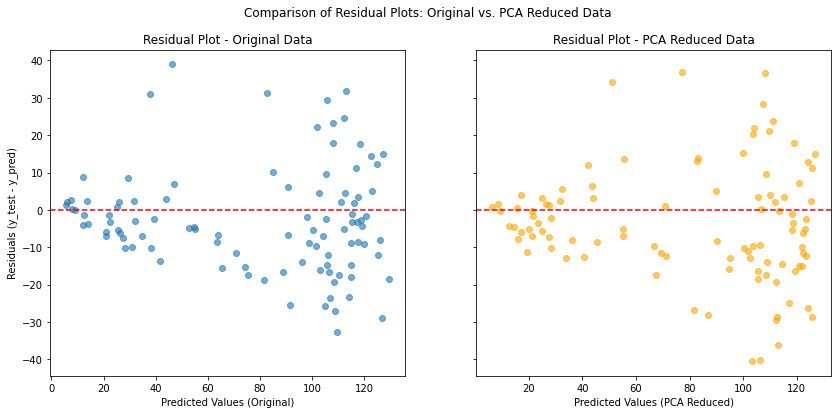

In [52]:
XGBoost= XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist')
XGBoost.fit(X_train, y_train)
y_pred = XGBoost.predict(relevant_test_features_scaled_df)
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred
y_pred_original = temp.groupby('unit')['prediction'].last().to_numpy()

XGBoost= XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist')
XGBoost.fit(X_train_reduced, y_train)
y_pred = XGBoost.predict(X_test_reduced)
temp = rolled_test.groupby('id').last()
temp['prediction'] = y_pred
y_pred_pca = temp.groupby('unit')['prediction'].last().to_numpy()

residuals_original = y_test - y_pred_original
residuals_pca = y_test - y_pred_pca

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Original data residual plot
axes[0].scatter(y_pred_original, residuals_original, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Values (Original)")
axes[0].set_ylabel("Residuals (y_test - y_pred)")
axes[0].set_title("Residual Plot - Original Data")

# PCA-reduced data residual plot
axes[1].scatter(y_pred_pca, residuals_pca, alpha=0.6, color="orange")
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted Values (PCA Reduced)")
axes[1].set_title("Residual Plot - PCA Reduced Data")

plt.suptitle("Comparison of Residual Plots: Original vs. PCA Reduced Data")
plt.show()

# Mean Predictor Model

In [53]:
y_mean_pred =[sum(y_test)/len(y_test)]* len(y_test)
rmse_mean_pred = np.sqrt(mean_squared_error(y_test, y_mean_pred))
print(f'Root Mean Squared Error (RMSE)for mean predictor: {rmse_mean_pred}')

Root Mean Squared Error (RMSE)for mean predictor: 41.555620558475596
